In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [38]:
# Read in the example catalog 
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/UTAH/2022/Dyer_Karvounis_Bethmann_April_2022_UtahFORGE/forgeseis.csv')
catalog

,Source,Trig Date,Trig Time,Origin Date,Origin Time,Profile,Status,Cluster,Y,X,Depth,MomMag,PGV,Stage,P S/N,S S/N,Quality,Error,Location
0,1,21/4/2022,05:56:37.903149,21/4/2022,05:56:37.867958,Primary,4,0,-849,3214,8190,-0.82,4.43,4,708.1,531.0,4.9,19.0,L2 Check
1,104,21/4/2022,13:41:21.545399,21/4/2022,13:41:21.483284,Primary,2,0,-845,3188,8273,-1.50,0.62,4,13.8,32.3,4.1,51.2,L2 msmx
2,113,21/4/2022,13:42:00.599649,21/4/2022,13:42:00.471574,Primary,2,0,-833,3162,8252,-1.87,0.78,4,9.8,53.4,5.4,25.2,L2 msmx
3,144,21/4/2022,13:43:49.495399,21/4/2022,13:43:49.453583,Primary,2,0,-847,3201,8279,-1.26,8.10,4,129.6,450.5,9.7,50.1,L2 msmx
4,147,21/4/2022,13:43:59.300649,21/4/2022,13:43:59.260487,Primary,2,0,-841,3215,8276,-1.36,7.92,4,58.0,300.7,8.7,42.0,L2 msmx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,389,21/4/2022,13:56:57.804149,21/4/2022,13:56:57.804150,Primary,2,0,-776,3114,8204,-2.03,0.44,4,3.2,7.3,2.9,0.0,Boot msmx
13132,9550,21/4/2022,16:20:04.033899,21/4/2022,16:20:04.033899,Primary,2,0,-986,3190,7776,-2.03,0.43,4,3.9,5.5,2.4,0.0,Boot msmx
13133,14743,21/4/2022,17:50:18.624401,21/4/2022,17:50:18.624401,Primary,2,0,-496,3192,7954,-2.03,0.38,4,3.3,6.5,2.9,0.0,Boot msmx
13134,26101,21/4/2022,23:26:01.976400,21/4/2022,23:26:01.976400,Primary,2,0,-1176,3076,7756,-2.03,0.43,4,6.5,8.4,2.9,0.0,Boot msmx


In [39]:
# Read in the example catalog 
#hydra = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe (2)\Yihe\UTAH\2022\HYDRAU\Stage3\Forge Hydraul.csv")
hydra = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/UTAH/2022/HYDRAU/Stage3/Forge Hydraul.csv')
#catalog

In [40]:
print(hydra)

          Time(m)  time  bpm
0        0.000000     0  0.0
1        0.016667     0  0.0
2        0.033333     0  0.0
3        0.050000     0  0.0
4        0.066667     0  0.0
...           ...   ...  ...
16857  280.950000     4  0.0
16858  280.966700     4  0.0
16859  280.983300     4  0.0
16860  281.000000     4  0.0
16861  281.016700     4  0.0

[16862 rows x 3 columns]


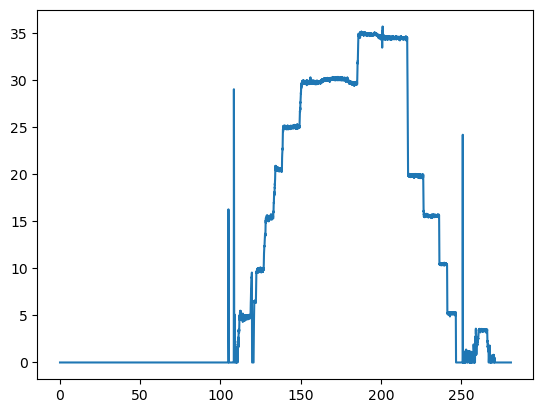

In [41]:
plt.plot(hydra["Time(m)"],hydra["bpm"])

In [42]:
from datetime import timedelta
timd = 281.0167

# Filters all arrays according to injection start and end dates, chatgpt assisted
time, rate,  = zip(*[
    (t,r)
    for t,r in zip(hydra["Time(m)"],hydra["bpm"])
    if t <= timd
])
print(time[-1])
time = np.array(time)
rate = np.array(rate)

281.0167


In [43]:
# 1 barrel = 158.987 liters?

# Example dataset (replace with your own)

intvl = np.diff(time)                          # Δt
avRt = (rate[:-1] + rate[1:]) / 2  # avg rate per interval
print(len(intvl),len(avRt))
volumes = intvl * avRt                              # volume injected in each interval


cumulative = np.cumsum(volumes)

print(cumulative)


16861 16861
[   0.            0.            0.         ... 3200.12612408 3200.12612408
 3200.12612408]


In [44]:
print(cumulative[-1])

3200.1261240750155


In [45]:
liters = cumulative[-1] * 158.987
print(liters)

508778.45208831446


In [46]:
from datetime import timedelta
# create injection end time
stInj = datetime(2022,4,21,12,48,22)
timd = timedelta(minutes=281.0167)
injEnd = ((stInj+timd)-stInj).total_seconds()/86400.0
print(injEnd)
injSt= stInj.timestamp()/86400.0
print(injSt)
print((stInj+timd).timestamp()/86400-injSt)

0.1951504861111111
19103.825254629628
0.19515048611356178


In [47]:
dt=[]
dto=[]
for i in range(len(catalog["Origin Date"])):
    
    date = list(map(int,catalog["Origin Date"][i].strip().split("/")))
    time = list(map(float,catalog["Origin Time"][i].strip().split(":")))
    #print(date,time)
    dtTemp = (datetime(date[2],date[1],date[0],int(time[0]),int(time[1]),int(time[2])))
    dt.append(dtTemp.timestamp()/86400-injSt)
    dto.append(dtTemp)

print(len(dt))

13136


In [48]:
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['MomMag'], catalog['X'], catalog['Y'], catalog['Depth'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dtF))

7295 7295


In [33]:
magF = np.array(magF)
# Calculate b-value for the 'M.magnit' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(catalog['MomMag'], bins, delta_b = 0.01)
histp, bp = b_value_functions.bpos(catalog['MomMag'])
bv = b
print(bv,bp,Mc)

1.0806113027756443 1.2226832693370882 -1.3999999999999997


In [49]:
# Find Nm>Mc
Nmmc =0
for i in range(len(catalog["MomMag"])):
    if catalog["MomMag"][i] > Mc:
        Nmmc+=1
print(Nmmc)

5299


In [50]:
# Seismo Index Calculation
vin2 = 3016* 158.987
Vin = 3000
seismo = np.log(Nmmc) - np.log(vin2) + bv*Mc
print(seismo)

-6.018091588392316
